# Diseño de parámetros robustos

El método Taguchi (ingeniería de calidad), que se desarrolló a partir del diseño de experimentos para el control de calidad, tiene como técnica central parámetros. Este método es una de las herramientas más efectivas para reducir las repeticiones en el diseño y suprimir varios costos, ya que permite incorporar la calidad de antemano.

## 12-1 Enfoque del diseño de parámetros robustos

### 1. ¿Qué es el diseño de parámetros?

El diseño de parámetros es un método de diseño que evalúa la funcionalidad frente al ruido, minimiza los efectos del ruido tanto como sea posible y determina los valores de los parámetros del sistema para lograr la función deseada.

El diseño de parámetros es la técnica central del **método Taguchi**, desarrollado y concebido por Genichi Taguchi a partir del diseño de experimentos. Este método Taguchi también es conocido como **ingenieria de calidad**.

El diseño de parámetros permite incorporar la calidad al reducir al máximo el impacto de diversas influencias (ruidos), incluso aquellas para las que no se pueden tomar medidas en situaciones reales. Por lo tanto, también se conoce como **diseño robusto**. ya que crea un diseño que es resistente a estos ruidos.

### 2. Diferencias entre el diseño de parámetros y el diseño de experimentos

En el diseño de experimentos, se realiza una prueba estadística para identificar los factores que afectan los valores de las características y se ajustan los niveles de los factores para cumplir con los objetivos (valores).
Por otro lado, el diseño de parámetros, que se desarrolló a partir del diseño de experimentos, no se enfoca en las pruebas estadísticas, sino que se centra en encontrar los parámetros de diseño que alteran la variabilidad de las características frente al ruido y establecer los valores de los parámetros que minimizan esa variabilidad.

También hay una diferencia en cómo se manejan las interacciones entra los factores.
En el diseño de experimentos, las interacciones entre factores también se consideran como causas de cambios en los valores de las características.
Estas interacciones se asignan a tablas ortogonales y se evalúa estadísticamente la existencia de sus efectos.
Por otro lado, en el diseño de parámetros, las interacciones entre los factores de control se ingnoran intencionalmente. La razón es que la optimización se vuelve difícil si existen interacciones entre estos factores.
Por lo tanto, en el diseño de parámetors, las interacciones no se asignan a tablas ortognales.
Las interacciones entre factores de error y factores de control, o entre factores de error y factores de señal, se cuantifican y evalúan mediante una estadística llamada relación señal/ruido (**SN**).

La **relación señal/ruido** (SN) es un valor que indica el grado de influencia del ruido en un producto o proceso. Se define como la relación entre la magnitud del efecto de la señal y la magnitud del efecto del ruido en la variación del valor de la característica.



### 3. Efectos del uso del diseño de parámetros

En el diseño de productos y procesos convencionales, primero se crea un prototio, producto o proceso de fabricación que alcanza los valores caracteristicos deseados, y luego se extraen los problemas de calidad para incorporarla. Esto a menudo lleva a un aumento de los costos.
Por otro lado, el diseño de parámetros permite incorporar la calidad de antemano.
Esto se logra mediante la experimentación en la etapa de diseño para determinar los valores óptimos de los parámetors que pueden controlarse tecnológicamente (parámetros de diseño), lo que a su vez ayuda a prevenir problemas de calidad.
Al mismo tiempo, permite suprimir al máximo  las repeticiones en el diseño, lo que aumenta la eficiencia del desarrollo.
Por lo tanto, en comparación con el diseño de productos y procesos convencionales, es posible reducir los costos en varios aspectos.



### 4. Enfoque del diseño de parámetors
En enfoque del diseño de parámetoros a menudo se entiende a través de lo que se conoce como **sistemas de ingeniería** (engineered systems).

Un sistema de ingenieria (engineered system) se compone de cuatro elementos:
* señal de entrada
* caracteristicas de salida
* parámetors de diseño
* ruido

Aquí, es crucial diferenciar entre los parámetros de diseño (factores de control) que pueden ser controlados tecnológicamente, y el ruido (factores de error), que no puede serlo.

Se llama **robustez** de la relación de entrada y salida al grado de resistencia frente al ruido en la relación entre entrada y salida.


### 5. Enfoque de la función básica y función ideal en el diseño de parámetros

**Función objetivo**: Se refiere a las funciones y rendimientos requeridos por los técnicos o usuarios, y siempre tiene un **valor objetivo**.

**Función básica**: Se refiere a los principios naturales, fenómenos o las propiedades de los materiales que los técnicos utilizan para lograr el valor objetivo de la función objetivo.

**Función ideal**: Se refiere a la relación ideal entre la entrada y la salida.


### 6. Factores utilizados en el diseño de parámetros

(1) Factor de error (ruido)
* **Disturbancia externa**: Ruido que proviene del exterior
* **Disturbancia interna**: Ruido generado internamente
* **Variabilidad entre productos**: Variabilidad en las piezas o materiales utilizados

(2) Factor de señal

En el sistema de ingenieria, la entrada mencionada corresponde a un factor de señal.


(3) Factor de control

Un factor de control es un parámetro que puede ser controlado por un ingeniero y que se incluye en un experimento.
Estos parámetros se especifican en planos de productos, especificaciones, y hojas de control de procesos (QC).

In [1]:
import os

try:
  os.chdir('../Python/QCKentei')
except:
  pass

path = os.getcwd()

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import f

## 12-02 Diseño de parámetros de características estáticas

### 1. Diseño de parámetros de características estáticas

Las **características estáticas** se refieren a aquellos casos en los que la entrada del sistema se mantiene fija y el valor objetivo para la salida es constante y no cambia. Dentro de estas, se llama **característica deseada** a aquella cuyo objetivo es un valor constante positivo.

Además de las caraterísticas deseada, existen las carateriísticas de cuanto más pequeño, mejor y las características de cuanto más grande, mejor, que se clasifican de la siguiente manera:

* Característica deseada: Aquellos cuyo valor objetivo es un valor positivo y constante.
* Característica de mínimo deseado: Cuyo valor objetivo no es negativo y cuanto más pequeño, mejor (el cero es el ideal).
* Característica de máximo deseado: Aquellos cuyo valor objetivo es un valor positivo y cuanto más grande, mejor.

### 2. Procedimiento para el diseño de parámetros de características estáticas

Paso 1: Establecimiento del método de evaluación de los factores de error y la variabilidad (dispersión) de la salida.

En el diseño de parámetros, es necesario evaluar la magnitud de la variación de la salida, por lo que se cambian los valores de los factores de error para crear forzosamente la variación en la salida.

Generalmente, se crean de 3 a 5 tipos de ruido diferentes y se combinan para formar factores de error de 2 o 3 niveles.
A esto se le llama combinación o mezcla (compundaje).


Paso 2: Establecimiento de los niveles de los factores de control (parámetros de diseño) y la disposición del experimento.

En el diseño de parámetros, se utilizan **tablas ortogonales** para realizar experimentos de manera eficiente, ya que se maneja un gran número de factores de control.

* Tabla ortogonal del sistema mezclado L18.
* Asignar el factor de error de mezcla N al exterior.

Paso 3: Cuantificación de la variabilidad de la salida y cálculo de la relación S/N.

 * Variación de la salida: $ \bigl( \frac{\sigma}{\mu} \bigr)^2 $

* En el método Taguchi, el inverso de esta variación de salida se llama la **relación S/N de la característica deseada**, y un valor mayor indica mayor resistencia al ruido.

* Relación S/N de la característica deseaba (valor en decibelios)

  * $ \hat{\eta} = 10 log(\frac{\hat{\mu}}{\hat{\sigma}})^2 $

Paso 4: Comprensión de los efectos de los factores.

* Cuanto mayor sea el factor que cambie significativamente la relación S/N, mayor será la resistencia al ruido, y cuanto mayor sea el factor que cambie significativamente  el promedio de salida, mejor se controlará la salida.

Paso 5: Optimización.

* Factor que cambia significativamente la relación S/N
* Factor que cambia significativamente el promedio de salida sin alterar significativamente la relación S/N.
* Diseño de dos etapas

Paso 6: Verificación de la reproducibilidad.

Se estima la variación de la salida (relación SN) y el promedio de la salida para las condiciones óptimas y las condiciones de referencia obtenidas en el experimento.
Posteriormente, se fabrica el producto con ese diseño y se mide bajo las mismas condiciones de ruido.
Finalmente, se confirma la reproducibilidad, es decir, si la diferencia entre las condiciones óptimas y las de referencia es la misma que se obtuvo en la estimación.

## 12.1

スイッチを入れると一定量のお湯が一定時間で沸く電気ポットを開発している。使用環境温度や水温、部品の経年変化などによって、お湯が沸く時間がばらつかないように設計したい。そこで、設計パラメータ６因子（A、B、C、D、F、G）にたいして $ L_{18} $ 混合系直交表を用いて、パラメータ設計を行うことにした。取り上げた誤差因子は、出力が小さくなる前と大きくなる側の $ N_1, N_2 $ に調合し、実験を行い、データを得た。
1. 得られたデータをもとに、各実験のSN比、出力平均をもとめよ。
2. 各制御因子のSN比と出力平均の水準平均をもとめよ。
3. ばらつきに最も影響を与える因子と目標値に合わせるのに最も適した因子を求めよ。


Estamos desarrollando una tetera eléctrica que hierve una cantidad fija de agua en un tiempo determinado al encender el interruptor. Queremos diseñarla de manera que el tiempo de ebullición del agua no varíe, a pesar de factores como la temperatura ambiente, la temperatura del agua y desgaste de los componentes. Para ello, hemos decidido realizar un diseño de parámetros utilizando un cuadro ortogonal combinado $ L_{18} $ para los seis factores de diseño (A, B, C, D, F, G). Los factores de error considerados fueron ajustados en las posiciones $ N_1 $ y $ N_2 $, que corresponden a los puntos donde la salida es más baja y más alta, respectivamente, y se realizaron experimentos para obtener datos.
1. Con los datos obtenidos, calcule los valores de SN y el promedio de salida para cada experimento.
2. Calcule los promedios de nivel de SN y de salida para cada factor de control.
3.Determine qué factor tiene el mayor impacto en la variabilidad y cuál es el factor más adecuado para ajustar el valor objetivo.

$ \hat{\eta} = 10 log (\frac{\hat{\mu}}{\hat{\sigma}})^2 = 10 log \frac{1/n(S_m -V_e)}{V_e}$

$ S_m = (\sum y_i)^2/n = n(\bar{y})^2 $

$ S_T = \sum y_i^2 $

$ S_V = S_t - S_m $

$ V_e = S_e/(n-1) $


In [3]:
import gspread 
from google.oauth2.service_account import Credentials

# 認証情報の設定
SERVICE_ACCOUNT_FILE = "my-project-vscode-452201-249bdb033f8c.json"  # JSONファイルのパス
SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]

credentials = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(credentials)

# スプレッドシートを開く（URLまたはスプレッドシートIDを使用）
SPREADSHEET_ID = "1RkO0VL4WR6cbPBfBEjz693Lo4SdUAoSvRHV491ggXTo"

sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet19") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()
df = pd.DataFrame.from_records(list_of_lists)

df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.drop(df.columns[0], axis=1)

df = df.apply(pd.to_numeric)

mu = df[['N1','N2']].mean(axis=1)
sigma = df[['N1','N2']].std(axis=1, ddof=1)

df['SN'] = 10*np.log10((mu/sigma)**2)
df['ave'] = mu

ave_SN = df['SN'].mean()
ave_ave = df['ave'].mean()

df.to_excel('Data_1/12_1.xlsx', index=False)

data = df.copy()

data

,e1,A,B,C,D,F,G,e2,N1,N2,SN,ave
1,1,1,1,1,1,1,1,1,201,226,21.639457,213.5
2,1,1,2,2,2,2,2,2,186,197,27.825822,191.5
3,1,1,3,3,3,3,3,3,187,207,22.879025,197.0
4,1,2,1,1,2,2,3,3,184,200,24.593925,192.0
5,1,2,2,2,3,3,1,1,189,202,26.554368,195.5
6,1,2,3,3,1,1,2,2,173,194,21.838635,183.5
7,1,3,1,2,1,3,2,3,173,192,22.660485,182.5
8,1,3,2,3,2,1,3,1,170,183,25.666327,176.5
9,1,3,3,1,3,2,1,2,167,184,23.286864,175.5
10,2,1,1,3,3,2,2,1,178,192,25.431174,185.0


Resultado del cálculo de la relación SN y el promedio de la salida para cada factor de control.

In [4]:
df2 = pd.DataFrame()
cols = df.columns[:-4]
for col in cols:
  tmp = df.groupby(col)['SN'].mean()
  df2 = pd.concat([df2, tmp], axis=1)

df2.columns=cols

df4 = df2.copy()

range_values = df2.max() - df2.min()
df2 = df2.T
df2['Dif. de niveles'] = range_values
df2 = df2.T


In [5]:
df3 = pd.DataFrame()

for col in cols:
  tmp = df.groupby(col)['ave'].mean()
  df3 = pd.concat([df3, tmp], axis=1)

df3.columns=cols

df5 = df3.copy()

range_values = df3.max() - df3.min()
df3 = df3.T
df3['Dif. de niveles'] = range_values
df3 = df3.T

In [6]:
print('Tabla 12.3 Promedio de niveles de la relación señal-ruido (SN) y del promedio de salida para cada factor de control')

df6 = pd.concat([df2, df3], axis=0)
df6 = df6.apply(lambda c: c.map(lambda x: f"{x:.2f}"))
df6.index.name = 'Niveles'
df6

Tabla 12.3 Promedio de niveles de la relación señal-ruido (SN) y del promedio de salida para cada factor de control


,e1,A,B,C,D,F,G,e2
Niveles,,,,,,,,
1,24.10,24.41,23.47,23.74,23.16,23.12,22.85,24.04
2,23.51,23.89,25.58,24.33,23.86,24.43,23.89,24.47
3,nan,23.13,22.37,23.35,24.40,23.87,24.69,22.92
Dif. de niveles,0.59,1.28,3.21,0.98,1.24,1.32,1.84,1.55
1,189.72,197.00,191.75,189.75,192.50,191.17,190.58,191.08
2,188.28,191.25,187.08,193.25,186.25,186.92,183.67,187.67
3,nan,178.75,188.17,184.00,188.25,188.92,192.75,188.25
Dif. de niveles,1.44,18.25,4.67,9.25,6.25,4.25,9.08,3.42


El factor que más influye en la variabilidad es B, ya que la diferencia en el promedio de los niveles de la relación S/N es la más grande.

El factor más adecuado para ajustar al valor objetivo es el factor A, ya que tiene la mayor diferencia en el promedio de salida.



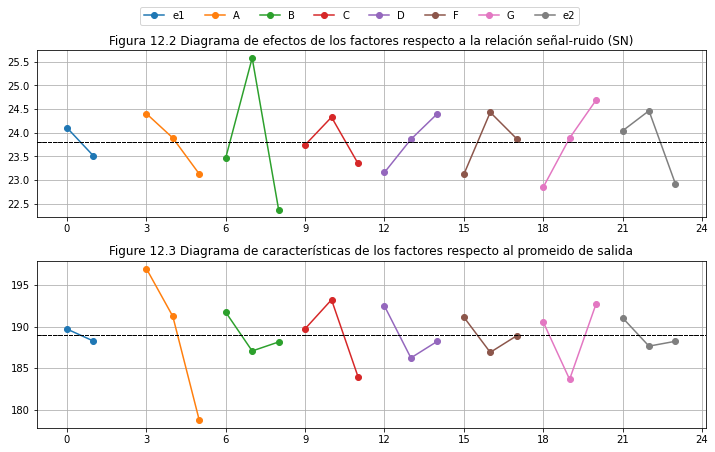

In [7]:
# Transformación de datos
df_long = df4.reset_index().melt(id_vars='index', var_name='Factor', value_name='SN')
df_long2 = df5.reset_index().melt(id_vars='index', var_name='Factor', value_name='ave')

# Creación de gráficos
fig, axs = plt.subplots(2,1,figsize=(10, 6))

# Gráfico por cada elemento
for factor in df_long['Factor'].unique():
    subset = df_long[df_long['Factor'] == factor]
    axs[0].plot(subset.index, subset['SN'], marker='o', linestyle='-', label=factor)
    axs[0].axhline(y=ave_SN, color='k', linestyle='--', linewidth=1)
    axs[0].xaxis.set_major_locator(plt.MultipleLocator(3))
    axs[0].set_title('Figura 12.2 Diagrama de efectos de los factores respecto a la relación señal-ruido (SN)')
    axs[0].grid(True)

for factor in df_long2['Factor'].unique():
    subset = df_long2[df_long2['Factor'] == factor]
    axs[1].plot(subset.index, subset['ave'], marker='o', linestyle='-')
    axs[1].axhline(y=ave_ave, color='k', linestyle='--', linewidth=1)
    axs[1].xaxis.set_major_locator(plt.MultipleLocator(3))
    axs[1].set_title('Figure 12.3 Diagrama de características de los factores respecto al promeido de salida')
    axs[1].grid(True)

axs[0].legend().remove()
fig.legend(loc="upper center", ncol=8, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.show()


## 12-03 Diseño de parámetros para características dinámicas

### 1. Diseño de parámetros para características dinámicas

La **característica dinámica** se refiere a la propiedad en la que el **valor de salida** cambia en respuesta a las variaciones en el **valor de entrada**.
En general, la mayoría de las tecnologías, productos, equipos de fabricación y procesos de producción tienen caracteristicas dinámicas que involucran entradas y salidas.

Por ejemplo, en un grifo de agua, la salida es la **cantidad de agua** y la entrada es el **número de vueltas del grifo**.
En la configuración de la temperatura de un refigerador, la salida es la **temperatura** y la entrada es el **dial de configuración de temperatura**.

Es necesario realizar un diseño en **dos etapas** para evitar que se vea **afectaodo por el ruido** dentro del rango de entrada.

Por lo tanto, en el diseño de parámetros de características dinámicas, es crucial examinar la entrada y la salida del sistema, y considerar la **función ideal** que existe entre ellas.
Con seto, el método de evaluación de la variación de la salida y el cálculo del valor de SN diferen de los del diseño de parámetros de caracteristicas estáticas estátics.
El resto del procedimiento es el mismo que el del deiseño de parámetros de caracteristicas estáticas.

【Consideración de la función ideal entre la entrada y la salida】

① Cuando la relación entre la entrada y la salida es lineal.

* Ecuación de proporcionalidad en el punto cero: Se busca un ideal en el que la entrada y la salida pasen por el punto cero, y la salida $ y $ aumente de manera proporcional a mediada que la entrada $ M $ aumenta.
  * $ y = \beta M $
  
  * El ruido cambia la pendiente de la relación entrada-salida.


* Ecuación de primer grado: Es un ideal en el quel la salida $ y $ aumenta proporcionalmente a medida que la entrada $ M $ aumenta, pero la salida no es cero cuando la entrada es cero, o no se desea que sea cero.

  * $ y = \alpha + \beta M $

  * El ruido causa un desplazamiento paralelo en la relación entre la entrada y salida.

* Ecuación de proporcionalidad en el punto de referencia: Se considera ideal que la salida $ y $ aumenta proporcionalmente a medida que la entrada $ M $ aumenta, pero en lugar de pasar por el punto cero, lo hoaga por un punto fijo $ (M_0, y_0 ) $.

  * $ y - y_0 = \beta(M - M_0) $

  * El punto de referencia no se ve afectado por el ruido, pero el ruido cambia la pendiente de la relación entre la entrada y salida.

② Cuando la relación entre la entrada y la salida es no lienal.

* Aquellos que pueden ser reemplazados por una relación linel meante la transformación de variables.

* Aquellos que, debido a requisitos técnicos, no pueden ser reemplazados por una relación lineal.


### 2. Procedimiento para el diseño de parámetros de características dinámicas

Paso 1: Establecimiento del método de evaluación de los factores de error y la variabilidad de la salida.

* En el diseño de parámetros de características dinámicas, se combina un diseño de dos factores de entrada y ruido para evaluar el efecto del ruido cuando el valor de la entrada cambia.

Paso 2: Configuración de los niveles de los parámetros de diseño (factores de control) y disposición del experimento.

* Configura los factores de control y los niveles.

Paso 3: Cuantificación de la variabilidad de la salida y cálculo de la relación señal-ruido (SN)

* Calcular la relación **SN** y **sesibilidad** para cada número de experimento.

  * Relación señal/ruido de las características dinámicas (valor en decibelios) : $ \hat{\eta} = 10 log \frac{\hat{\beta}^2}{\hat{\sigma}^2}$

  * Sensibilidad de las características dinámicas (valor en decibelios) : $ \hat{S} = 10 log \hat{\beta}^2 $

## 12.2

溶接機の溶接条件を最適化するため、信号因子として電流値を0.14kA, 0.15kA, 0.16kAの3水準、誤差因子として材料特性の3水準を外側に割り付けたL18直交表実験を行い、溶け込み量(mm)を計測した。ある実験Noの結果を表12.8に示す。動特性のSN比と感度を求めよ。


Para optimizar las condiciones de soldadura de una máquina de soldar, se realizó un experimento utilizando un diseño ortogonal L18, asignando como factor de señal tres niveles de corriente: 0.14kA, 0.15kA y 0.16kA, y como factor de error tres niveles de las características del material, distribuidos en el exterior. Se midió la cantidad de penetración (mm). Los resultados de un experimento en particular se muestran en la Tabla 12.8. Calcule la relación señal-ruido (SN) y la sensibilidad de las características dinámicas.


In [8]:
# Datos experimentales (N1, N2, N3)
data = {
    'N1': [5.2, 6.3, 8.3],
    'N2': [6.8, 7.2, 9.5],
    'N3': [8.2, 9.8, 11.4]
}
df = pd.DataFrame(data)
df0 = df.T
df0.columns = ['M1(0.14kA)', 'M2(0.15kA)', 'M3(0.16kA)']

print("Resultados en un experimento para optimizar las condiciones de soldadura.")

df0

Resultados en un experimento para optimizar las condiciones de soldadura.


,M1(0.14kA),M2(0.15kA),M3(0.16kA)
N1,5.2,6.3,8.3
N2,6.8,7.2,9.5
N3,8.2,9.8,11.4


Cálculo de la variación total $ S_T $

$ S_T = \sum y_{ij}^2 = 617.190 $

El cálculo del número efectivo de repeticiones $ r $

$ r = r_0 n \sum_{i=1}^3 M_j^2 = 0.2031 $

Eñ cálculo de la forma lineal $ L_i $

$ L_1 = y_{11} M_1 + y_{12} M_2 + y_{13} M_3 = 3.001 $

$ L_2 = y_{21} M_1 + y_{22} M_2 + y_{23} M_3 = 3.552 $

$ L_3 = y_{31} M_1 + y_{32} M_2 + y_{33} M_3 = 4.442 $

In [9]:

# Factor de señal (M1, M2, M3)
signal_factors = {'M1': 0.14, 'M2': 0.15, 'M3': 0.16}

# Configuración del número de repeticiones r0
r0 = 1

# Número de niveles del factor de error
n = len(data['N1'])

# Número de niveles del factor de señal
k = len(signal_factors)

# Cálculod de la variación total ST
def calculate_total_variance(data):
    ST = sum(np.sum(np.square(values)) for values in data.values())
    return ST

ST = calculate_total_variance(data)
print(f"\nVariación total (ST): {ST:.3f}")


# Cálculo del efecto lineal（L1, L2, L3）
def calculate_linear_effect(signal_factors, data):
    signal_array = np.array(list(signal_factors.values()))
    return np.array([np.sum(np.array(data[key]) * signal_array) for key in ['N1', 'N2', 'N3']])

L_values = calculate_linear_effect(signal_factors, data)

# Cálculo del orden efectivo r
sum_Mi_squared = sum(M**2 for M in signal_factors.values())
sum_Mi = sum(signal_factors.values())
r = sum_Mi_squared * n * r0
print("\nOrden efectivo r:", r)

print(f"\nEfecto lineal (L1): {L_values[0]:.3f}")
print(f"Efecto lineal (L2): {L_values[1]:.3f}")
print(f"Efecto lineal (L3): {L_values[2]:.3f}")



Variación total (ST): 617.190

Orden efectivo r: 0.2031

Efecto lineal (L1): 3.001
Efecto lineal (L2): 3.552
Efecto lineal (L3): 4.442


Cálculo del efectos de la entrada $ S_{\beta} = 1/r (L_1 + L_2 + L_3)^2 = 595.224 $

El cálculo del efecto del factor de error compuesto $ S_{\beta \times N} $

$ S_{\beta \times N} = \frac{L_1^2 + L_2^2 + L_3^2 }{r/r_0n} - S_{\beta} = 15.619 $

El cálculo de la varianza de error $ V_e $

$ V_e = \frac{S_e}{r_0 n k -n} = 1.0578 $

El cálculo de la varianción de la varianza de error $ S_{N^{'}}  $

$ S_{N^{'}} = S_{\beta \times N} + S_e = S_T - S_{\beta} = 21.966 $

El cálculo del error total $ V_{N^{'}} $

$ V_{N^{'}} = \frac{S_{N^{'}}}{r_0 n k -1} = 2.746 $


In [10]:
# Cálculo del efecto de entrada Sβ
S_beta = np.square(sum(L_values)) / r
print(f"Efecto de entrada Sβ: {S_beta:.3f}")

# Cálculo del efecto del factor de error de formulación SβxN
S_beta_N = sum(L**2 for L in L_values)*(n * r0 / r) - S_beta
print(f"Efecto del factor de error de formulación Sβ×N: {S_beta_N:.3f}")

# Cálculo de la variabilidad del error S_e
S_e = ST - S_beta - S_beta_N
print(f"\nVariabilidad del error S_e: {S_e:.3f}")

# Cálculo de la varianza del error V_e
V_e = S_e / (r0*n*k -n)
print(f"Varianza del error V_e: {V_e:.4f}")

# Cálculo de la varianza del error S_Nの
S_N = ST - S_beta
print(f"\nVarianza del error S_N: {S_N:.3f}")

# Cálculo de la varianza total del error V_Nの計算
V_N = S_N / (r0*n*k -1)
print(f"Varianza total del error V_N: {V_N:.3f}")



Efecto de entrada Sβ: 595.224
Efecto del factor de error de formulación Sβ×N: 15.619

Variabilidad del error S_e: 6.347
Varianza del error V_e: 1.0578

Varianza del error S_N: 21.966
Varianza total del error V_N: 2.746


Relación señal/ruido (SN)

$ \hat{\eta} = 10 log \frac{\hat{\beta}^2}{\hat{\sigma}^2} = 30.3 $

Sensibilidad

$ \hat{S} = 10 log \frac{1}{r}(S_{\beta} - V_e) = 34.7 $

In [11]:
# Cálculo de la relación SN
eta = 10*np.log10((S_beta - V_e)/(r*V_N))
print(f"\nRelación SN eta: {eta:.1f} (dB)")

# Cálculo de la sensibilidad ｓ
S = 10*np.log10((S_beta -V_e)/r)
print(f"Sensibilidad S: {S:.1f} (dB)")


Relación SN eta: 30.3 (dB)
Sensibilidad S: 34.7 (dB)


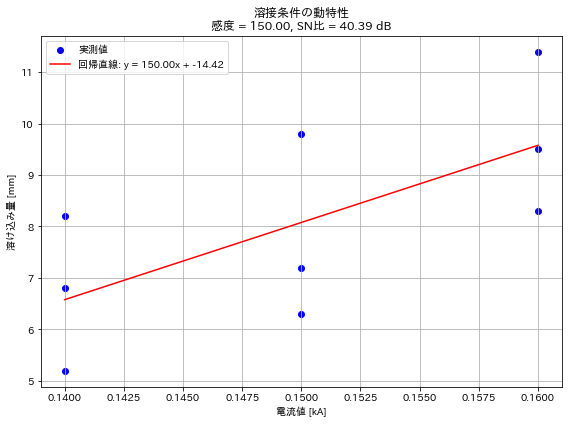

In [13]:
import statsmodels.api as sm
import japanize_matplotlib

# データ入力
M = np.tile([0.14, 0.15, 0.16], 3)
y = np.array([
    5.2, 6.3, 8.3,  # N1
    6.8, 7.2, 9.5,  # N2
    8.2, 9.8,11.4   # N3
])

# 線形回帰
X = sm.add_constant(M)
model = sm.OLS(y, X).fit()

a = model.params[1]
b = model.params[0]
residuals = model.resid
sigma_e2 = np.var(residuals, ddof=1)
sn_ratio = 10 * np.log10(a**2 / sigma_e2)

# 回帰直線用データ
M_fit = np.linspace(min(M), max(M), 100)
y_fit = a * M_fit + b

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(M, y, color='blue', label='実測値')
plt.plot(M_fit, y_fit, color='red', label=f'回帰直線: y = {a:.2f}x + {b:.2f}')
plt.xlabel('電流値 [kA]')
plt.ylabel('溶け込み量 [mm]')
plt.title(f'溶接条件の動特性\n感度 = {a:.2f}, SN比 = {sn_ratio:.2f} dB')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
import numpy as np
import statsmodels.api as sm

# データ入力
M = np.tile([0.14, 0.15, 0.16], 3)
y = np.array([5.2, 6.3, 8.3, 6.8, 7.2, 9.5, 8.2, 9.8, 11.4])

# 回帰モデルの構築
X = sm.add_constant(M)
model = sm.OLS(y, X).fit()

# 回帰結果の詳細を表示
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     5.750
Date:                Tue, 05 Aug 2025   Prob (F-statistic):             0.0476
Time:                        19:42:49   Log-Likelihood:                -15.480
No. Observations:                   9   AIC:                             34.96
Df Residuals:                       7   BIC:                             35.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4222      9.397     -1.535      0.1

/Users/takanohiroshi/.pyenv/versions/3.10.5/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [21]:
notebook_name = 'QCKentei1-12.ipynb'
notebook_name_html = notebook_name.replace(".ipynb",".html")

!jupyter nbconvert --to html {notebook_name}

[NbConvertApp] Converting notebook QCKentei1-12.ipynb to html
[NbConvertApp] Writing 713791 bytes to QCKentei1-12.html
